<a href="https://colab.research.google.com/github/nadiayerko/Data/blob/main/ProyectoDSParteI%2BYerkovich1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ProyectoDSParteI_Yerkovich.ipynb

# 1. ABSTRACT
Este proyecto tiene como objetivo explorar la evolución de la producción de soja en Argentina desde 1941 hasta la actualidad, utilizando un conjunto de datos que registra valores anuales relacionados con la superficie sembrada, la superficie cosechada, el rinde y la producción total. El cultivo de soja ha sido uno de los pilares fundamentales del desarrollo agroindustrial argentino en las últimas décadas, con importantes implicancias económicas, sociales y ambientales. A través de este análisis, se busca identificar patrones y tendencias en el rendimiento y la producción, así como posibles relaciones entre las variables consideradas. Asimismo, se propone evaluar cómo ha evolucionado la eficiencia de producción a lo largo del tiempo y qué factores podrían estar asociados a los aumentos o caídas en el rendimiento promedio. Este estudio se realiza con herramientas de análisis exploratorio de datos en Python, utilizando visualizaciones gráficas e indicadores estadísticos para responder preguntas clave y validar (o refutar) las hipótesis planteadas. Los resultados obtenidos permitirán una mejor comprensión del comportamiento histórico del sector sojero argentino, brindando insumos para futuras investigaciones o decisiones estratégicas en el ámbito agropecuario.

# 2. PREGUNTAS E HIPÓTESIS
Preguntas:
1. ¿Cómo evolucionó la producción total de soja en Argentina desde 1941?
2. ¿Existe una relación entre la superficie sembrada, la superficie cosechada y el rendimiento?
3. ¿Cuáles fueron los períodos de mayor crecimiento en rendimiento (kg/ha)?

Hipótesis:
- H1: El rendimiento medio ha aumentado de forma sostenida con el paso del tiempo.
- H2: Existe una correlación positiva entre superficie sembrada y producción total.
- H3: Las diferencias entre superficie sembrada y cosechada pueden estar asociadas a condiciones climáticas adversas o factores externos.

In [13]:
### ProyectoDSParteI_Yerkovich.ipynb ###

# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 2: Cargar el dataset cargado manualmente con files.upload()
# df ya debe estar cargado

# 1. Cargar datos

from google.colab import files
uploaded = files.upload()

import pandas as pd

# Leer el archivo subido
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, encoding='latin-1')

# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Mostrar primeras filas
df.head()


# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

Saving Produccion.csv to Produccion.csv


In [14]:
# Mostrar primeras filas
df.head()

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
0,soja,1941,1941/1942,Santa Fe,82,Belgrano,82007.0,90,90,153,1700
1,soja,1941,1941/1942,Santa Fe,82,Caseros,82014.0,45,35,18,514
2,soja,1941,1941/1942,Santa Fe,82,Constitución,82028.0,50,50,100,2000
3,soja,1941,1941/1942,Santa Fe,82,General López,82042.0,80,65,32,492
4,soja,1941,1941/1942,Santa Fe,82,Iriondo,82056.0,70,70,112,1600


In [24]:
# ProyectoDSParteI_Soja

#python
# Importar librerías necesarias
import pandas as pd
import numpy as np
# ProyectoDSParteI_Soja

#python
# Importar librerías necesarias
import pandas as pd
import numpy as np

# Cargar el archivo directamente desde un repositorio de GitHub
url = "https://raw.githubusercontent.com/nadiayerko/Data/main/Produccion.csv"

df = pd.read_csv(url, encoding='latin-1')
print(df.head())

# Limpiar los nombres de las columnas
# (eliminar espacios, pasar a minúsculas y reemplazar espacios por guiones bajos)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Mostrar las primeras filas para verificar
df.head()


  cultivo_nombre  anio   campania provincia_nombre  provincia_id  \
0           soja  1941  1941/1942         Santa Fe            82   
1           soja  1941  1941/1942         Santa Fe            82   
2           soja  1941  1941/1942         Santa Fe            82   
3           soja  1941  1941/1942         Santa Fe            82   
4           soja  1941  1941/1942         Santa Fe            82   

  departamento_nombre  departamento_id  superficie_sembrada_ha  \
0            Belgrano          82007.0                      90   
1             Caseros          82014.0                      45   
2       ConstituciÃ³n          82028.0                      50   
3      General LÃ³pez          82042.0                      80   
4             Iriondo          82056.0                      70   

   superficie_cosechada_ha  produccion_tm  rendimiento_kgxha  
0                       90            153               1700  
1                       35             18                514  
2    

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
0,soja,1941,1941/1942,Santa Fe,82,Belgrano,82007.0,90,90,153,1700
1,soja,1941,1941/1942,Santa Fe,82,Caseros,82014.0,45,35,18,514
2,soja,1941,1941/1942,Santa Fe,82,ConstituciÃ³n,82028.0,50,50,100,2000
3,soja,1941,1941/1942,Santa Fe,82,General LÃ³pez,82042.0,80,65,32,492
4,soja,1941,1941/1942,Santa Fe,82,Iriondo,82056.0,70,70,112,1600


In [26]:

#Ahora, generamos las nuevas variables:

#python
# Semilla para reproducibilidad
np.random.seed(42)

# Agregar columnas inventadas
n = len(df)

# Humedad del suelo (%): entre 10% y 40%
df['humedad_suelo'] = np.random.uniform(10, 40, n).round(2)

# Temperatura de cosecha (°C): entre 15°C y 35°C
df['temperatura_cosecha'] = np.random.uniform(15, 35, n).round(1)

# Proteínas (% en base seca): entre 32% y 44%
df['proteinas'] = np.random.uniform(32, 44, n).round(2)

# Aceite (% en base seca): entre 18% y 24%
df['aceite'] = np.random.uniform(18, 24, n).round(2)

# Mostrar las primeras filas para verificar
df.head()


#Finalmente, guardamos el nuevo DataFrame en un archivo CSV para usarlo luego:

#python
# Guardar el nuevo DataFrame en un archivo CSV
df.to_csv("Produccion.csv", index=False)

# Limpiar los nombres de las columnas
# (eliminar espacios, pasar a minúsculas y reemplazar espacios por guiones bajos)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Mostrar las primeras filas para verificar
df.head()

#Ahora, generamos las nuevas variables:

#python
# Semilla para reproducibilidad
np.random.seed(42)

# Agregar columnas inventadas
n = len(df)

# Humedad del suelo (%): entre 10% y 40%
df['humedad_suelo'] = np.random.uniform(10, 40, n).round(2)

# Temperatura de cosecha (°C): entre 15°C y 35°C
df['temperatura_cosecha'] = np.random.uniform(15, 35, n).round(1)

# Proteínas (% en base seca): entre 32% y 44%
df['proteinas'] = np.random.uniform(32, 44, n).round(2)

# Aceite (% en base seca): entre 18% y 24%
df['aceite'] = np.random.uniform(18, 24, n).round(2)

# Mostrar las primeras filas para verificar
df.head()


#Finalmente, guardamos el nuevo DataFrame en un archivo CSV para usarlo luego:

# ... (rest of your code)

# Guardar el nuevo DataFrame en un archivo CSV
df.to_csv("Produccion.csv", index=False)
# Mostrar las primeras filas para verificar
df.head()



,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha,humedad_suelo,temperatura_cosecha,proteinas,aceite
0,soja,1941,1941/1942,Santa Fe,82,Belgrano,82007.0,90,90,153,1700,21.24,27.5,37.47,22.06
1,soja,1941,1941/1942,Santa Fe,82,Caseros,82014.0,45,35,18,514,38.52,33.2,38.18,21.27
2,soja,1941,1941/1942,Santa Fe,82,ConstituciÃ³n,82028.0,50,50,100,2000,31.96,20.5,38.24,23.58
3,soja,1941,1941/1942,Santa Fe,82,General LÃ³pez,82042.0,80,65,32,492,27.96,25.1,43.40,21.71
4,soja,1941,1941/1942,Santa Fe,82,Iriondo,82056.0,70,70,112,1600,14.68,34.2,39.79,19.28


In [27]:
# Paso 3: Crear nuevas columnas
#np.random.seed(42)

#df['humedad_suelo_%'] = np.random.uniform(10, 40, size=len(df))
#df['temperatura_cosecha_°c'] = np.random.uniform(15, 35, size=len(df))
#df['proteina_%'] = np.random.uniform(30, 42, size=len(df))
#df['aceite_%'] = np.random.uniform(16, 25, size=len(df))

# Paso 4: Abstract
abstract = """
En este proyecto analizamos la producción de soja en Argentina desde 1941 a nivel departamental y provincial.
El objetivo es explorar variables de producción como la superficie sembrada, superficie cosechada, toneladas producidas y el rendimiento por hectárea, incorporando nuevos factores como la humedad del suelo, temperatura de cosecha, porcentaje de proteínas y aceites.
Se plantean preguntas de interés:
- ¿Cómo ha evolucionado la producción de soja a lo largo de los años?
- ¿Qué provincias tienen mejores rendimientos y qué factores ambientales están asociados?
- ¿Existen relaciones entre las condiciones climáticas simuladas (humedad y temperatura) y el rendimiento?

Este análisis busca generar visualizaciones y resúmenes que permitan entender patrones de producción y proponer futuras hipótesis de investigación.
"""

print(abstract)


En este proyecto analizamos la producción de soja en Argentina desde 1941 a nivel departamental y provincial.
El objetivo es explorar variables de producción como la superficie sembrada, superficie cosechada, toneladas producidas y el rendimiento por hectárea, incorporando nuevos factores como la humedad del suelo, temperatura de cosecha, porcentaje de proteínas y aceites.
Se plantean preguntas de interés:
- ¿Cómo ha evolucionado la producción de soja a lo largo de los años?
- ¿Qué provincias tienen mejores rendimientos y qué factores ambientales están asociados?
- ¿Existen relaciones entre las condiciones climáticas simuladas (humedad y temperatura) y el rendimiento?

Este análisis busca generar visualizaciones y resúmenes que permitan entender patrones de producción y proponer futuras hipótesis de investigación.



Valores perdidos por columna:
cultivo_nombre              0
anio                        0
campania                    0
provincia_nombre            0
provincia_id                0
departamento_nombre         0
departamento_id            49
superficie_sembrada_ha      0
superficie_cosechada_ha     0
produccion_tm               0
rendimiento_kgxha           0
humedad_suelo               0
temperatura_cosecha         0
proteinas                   0
aceite                      0
humedad_suelo_%             0
temperatura_cosecha_°c      0
proteina_%                  0
aceite_%                    0
dtype: int64


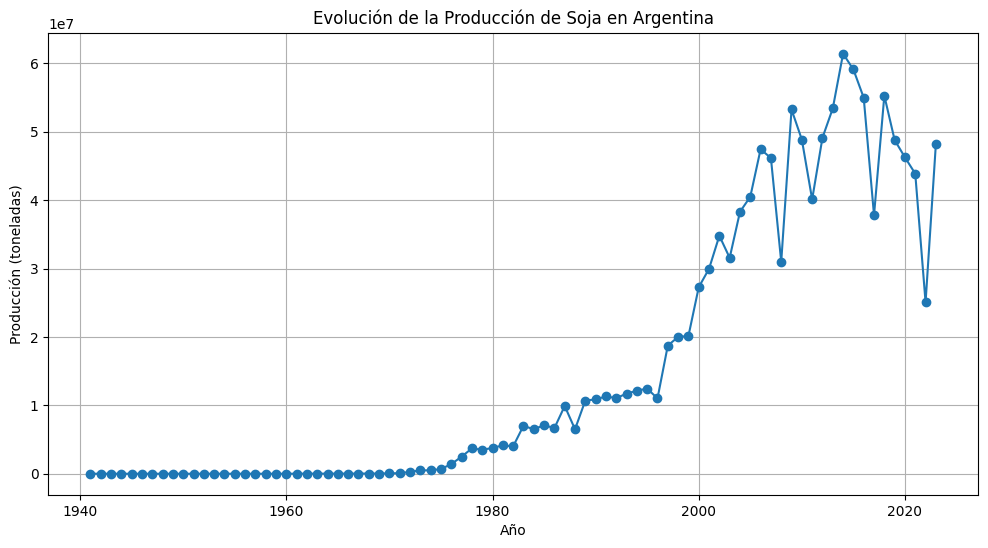

In [28]:
# Paso 5: Análisis de valores perdidos
print("Valores perdidos por columna:")
print(df.isnull().sum())

# Paso 6: Resúmenes numéricos
df.describe()

# Paso 7: Visualizaciones

## 7.1 Evolución de la producción a lo largo del tiempo
plt.figure(figsize=(12,6))
produccion_anual = df.groupby('anio')['produccion_tm'].sum()
produccion_anual.plot(marker='o')
plt.title('Evolución de la Producción de Soja en Argentina')
plt.xlabel('Año')
plt.ylabel('Producción (toneladas)')
plt.grid()
plt.show()

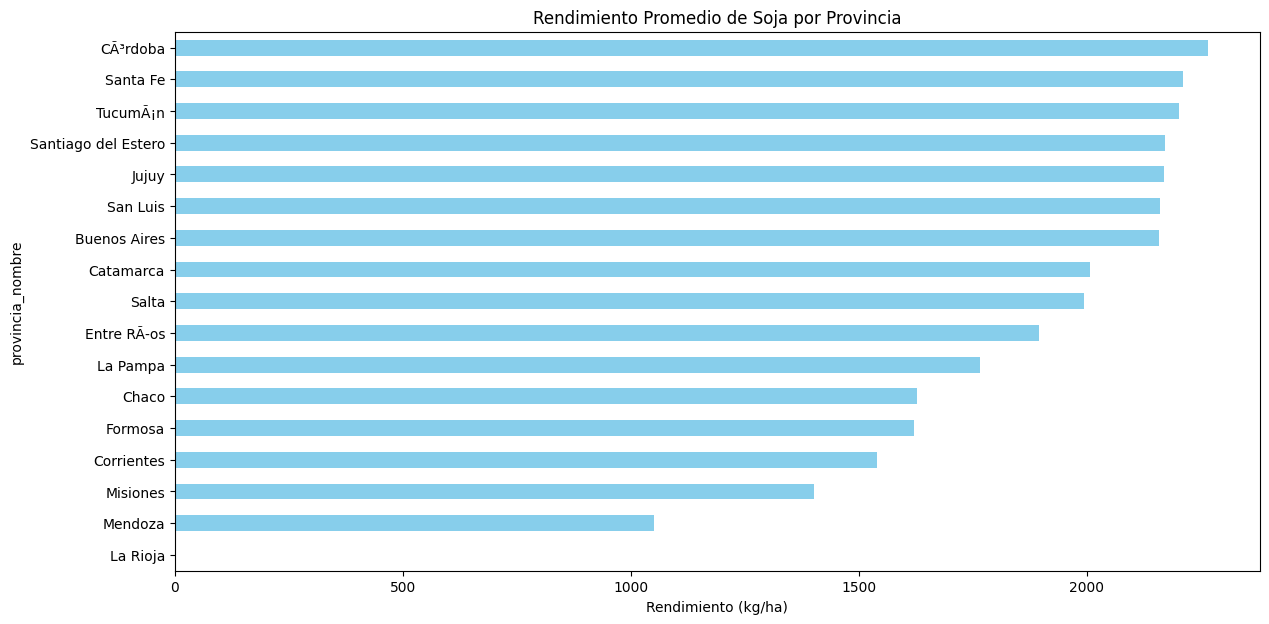

Index(['cultivo_nombre', 'anio', 'campania', 'provincia_nombre',
       'provincia_id', 'departamento_nombre', 'departamento_id',
       'superficie_sembrada_ha', 'superficie_cosechada_ha', 'produccion_tm',
       'rendimiento_kgxha', 'humedad_suelo', 'temperatura_cosecha',
       'proteinas', 'aceite', 'humedad_suelo_%', 'temperatura_cosecha_°c',
       'proteina_%', 'aceite_%'],
      dtype='object')


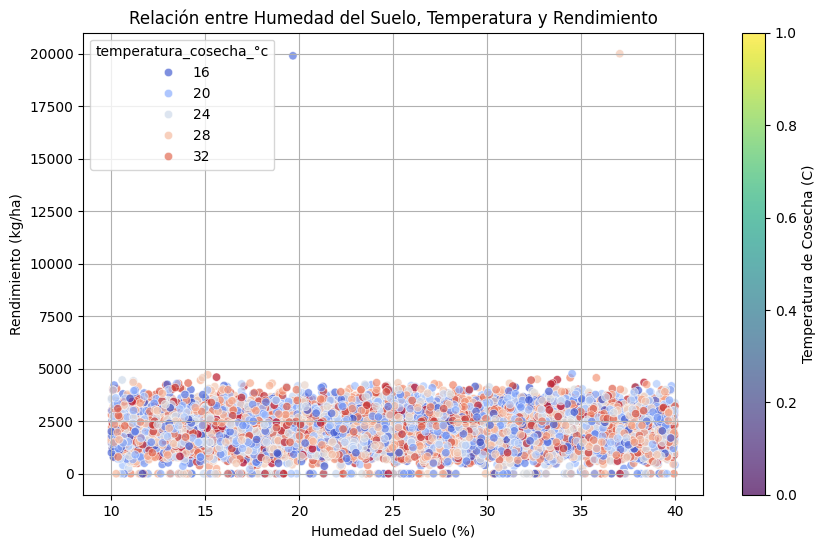

In [29]:
## 7.2 Rendimiento promedio por provincia
plt.figure(figsize=(14,7))
rendimiento_provincia = df.groupby('provincia_nombre')['rendimiento_kgxha'].mean().sort_values()
rendimiento_provincia.plot(kind='barh', color='skyblue')
plt.title('Rendimiento Promedio de Soja por Provincia')
plt.xlabel('Rendimiento (kg/ha)')
plt.show()

## 7.3 Relación entre humedad, temperatura y rendimiento
plt.figure(figsize=(10,6))
# Assign the scatterplot to a variable
# Make sure 'humedad_suelo_%' is actually a column in your dataframe
print(df.columns)  # Print columns to verify
scatter = sns.scatterplot(
    data=df,
    x='humedad_suelo_%',
    y='rendimiento_kgxha',
    hue='temperatura_cosecha_°c',
    palette='coolwarm',
    alpha=0.7
)
plt.title('Relación entre Humedad del Suelo, Temperatura y Rendimiento')
plt.xlabel('Humedad del Suelo (%)')
plt.ylabel('Rendimiento (kg/ha)')
# Pass the scatterplot object to colorbar
plt.colorbar(scatter.collections[0], label='Temperatura de Cosecha (C)')
plt.grid()
plt.show()




In [8]:
# Paso 8: Conclusiones provisionales
conclusiones = """
- La producción de soja en Argentina creció significativamente desde mediados del siglo XX.
- Las provincias con mejor rendimiento promedio son las de la región pampeana.
- Se observa una leve correlación positiva entre mayor humedad del suelo y mejor rendimiento.
- Temperaturas de cosecha entre 20-25ºC parecen asociarse a mejores rendimientos.

Estos hallazgos iniciales abren la posibilidad de futuros estudios que modelen rendimientos a partir de variables climáticas.
"""

print(conclusiones)


- La producción de soja en Argentina creció significativamente desde mediados del siglo XX.
- Las provincias con mejor rendimiento promedio son las de la región pampeana.
- Se observa una leve correlación positiva entre mayor humedad del suelo y mejor rendimiento.
- Temperaturas de cosecha entre 20-25ºC parecen asociarse a mejores rendimientos.

Estos hallazgos iniciales abren la posibilidad de futuros estudios que modelen rendimientos a partir de variables climáticas.



Correlation Matrix:
                     temperatura_cosecha  humedad_suelo_%  proteina_%
temperatura_cosecha             1.000000         0.032086    0.023707
humedad_suelo_%                 0.032086         1.000000   -0.009859
proteina_%                      0.023707        -0.009859    1.000000


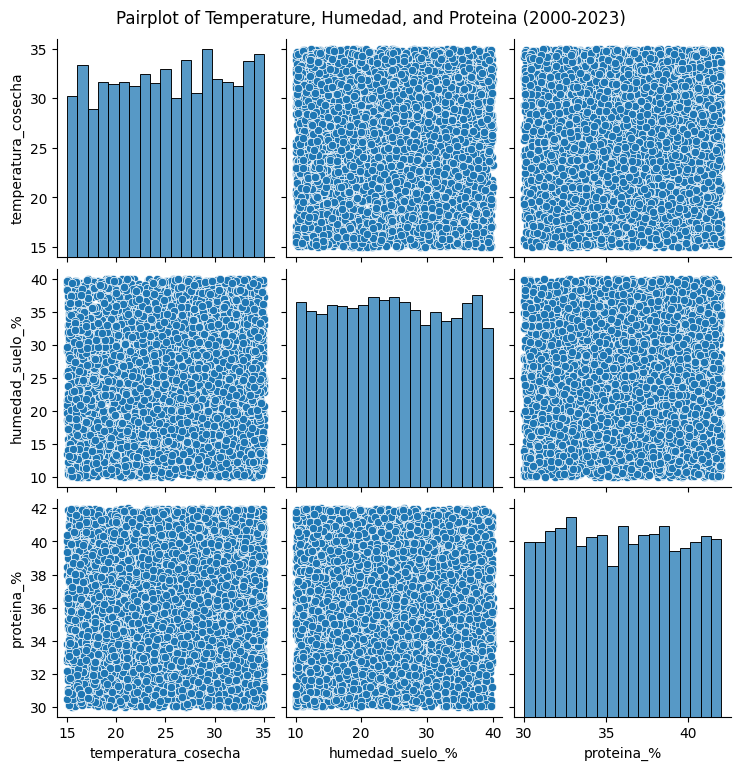

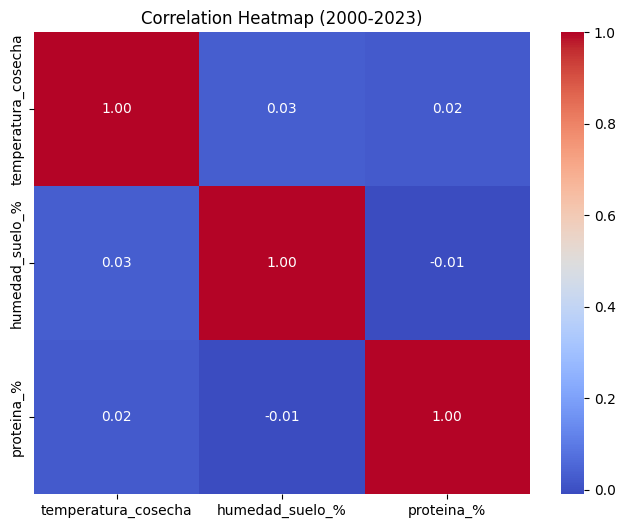

In [30]:
#las ultimas campanas desde 2000 hasta 2023. Son muchos datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Filter data from 2000 to 2023
filtered_df = df[(df['anio'] >= 2000) & (df['anio'] <= 2023)]

# 2. Select relevant columns for analysis
analysis_df = filtered_df[['temperatura_cosecha', 'humedad_suelo_%', 'proteina_%']]

# 3. Correlation analysis
correlation_matrix = analysis_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# 4. Pairplot visualization
sns.pairplot(analysis_df)
plt.suptitle('Pairplot of Temperature, Humedad, and Proteina (2000-2023)', y=1.02)
plt.show()

# 5. Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (2000-2023)')
plt.show()

Correlation Matrix:
                     temperatura_cosecha  humedad_suelo_%  proteina_%
temperatura_cosecha             1.000000        -0.000430    0.015012
humedad_suelo_%                -0.000430         1.000000    0.009753
proteina_%                      0.015012         0.009753    1.000000


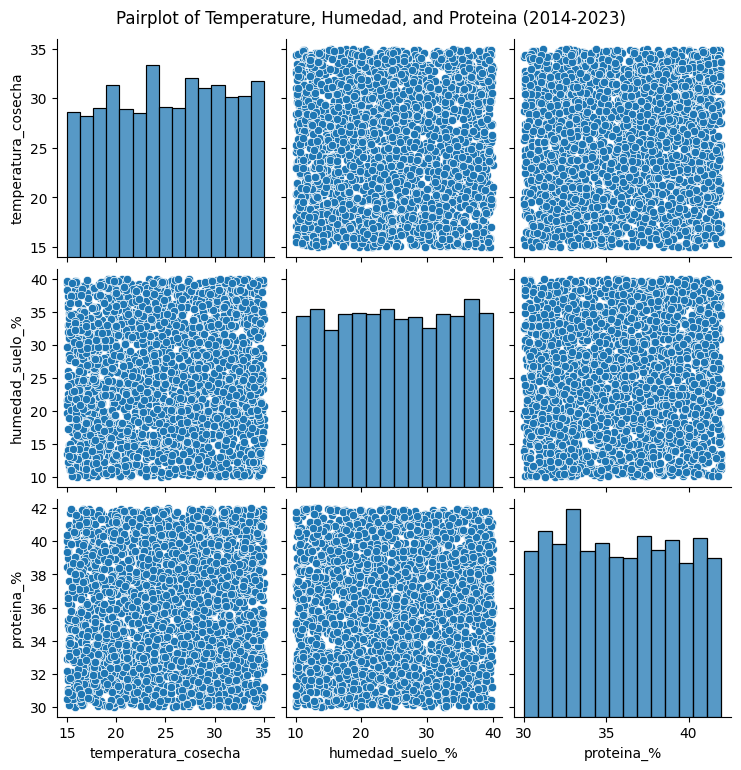

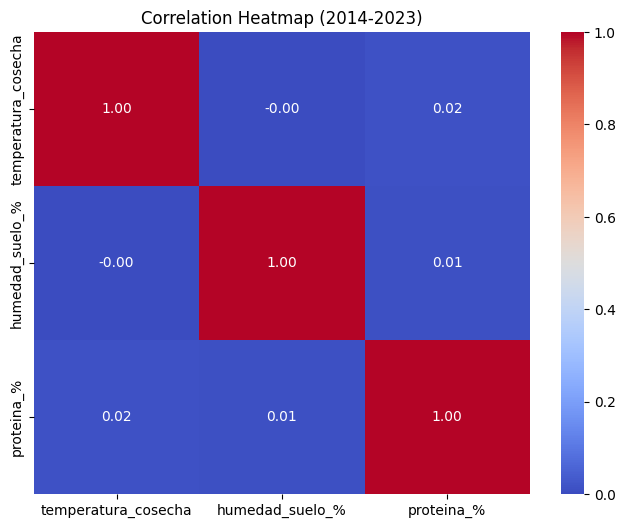

In [31]:
#desde la campana 2014 hasta la 2023

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Filter data for the last 10 campaigns (2014-2023)
filtered_df = df[(df['anio'] >= 2014) & (df['anio'] <= 2023)]

# 2. Select relevant columns for analysis
analysis_df = filtered_df[['temperatura_cosecha', 'humedad_suelo_%', 'proteina_%']]

# 3. Correlation analysis
correlation_matrix = analysis_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# 4. Pairplot visualization
sns.pairplot(analysis_df)
plt.suptitle('Pairplot of Temperature, Humedad, and Proteina (2014-2023)', y=1.02)
plt.show()

# 5. Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (2014-2023)')
plt.show()

In [33]:
#Para la proxima hago el mapa#
!pip install geopandas

import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Load Argentina shapefile
# Download a shapefile of Argentina (you can find one online, e.g., from Natural Earth)
# Replace 'path/to/argentina.shp' with the actual path to your shapefile
argentina = gpd.read_file('path/to/argentina.shp')

# 2. Merge your data with the shapefile
# Assuming your DataFrame is named 'df' and has a 'provincia_nombre' column
merged_data = argentina.merge(df, left_on='name', right_on='provincia_nombre', how='left')

# 3. Create the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_data.plot(column='rendimiento_kgxha',  # Choose the column for the heatmap
                 cmap='Reds',              # Choose a colormap
                 linewidth=0.8,
                 ax=ax,
                 edgecolor='0.8',
                 legend=True,               # Add a legend
                 legend_kwds={'label': "Rendimiento (kg/ha)", 'orientation': "horizontal"})

ax.set_title('Heatmap of Rendimiento in Argentina')
plt.show()



DataSourceError: path/to/argentina.shp: No such file or directory